In [30]:
### Init network Build
import numpy as np
from pathlib import Path
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import display
import pandas as pd
from osgeo import gdal
import keras

In [31]:
tif_list = [f for f in Path('../sample_data').iterdir() if '.tiff' in str(f)]
print(len(tif_list))
tif_list

11


[PosixPath('../sample_data/1_LRB-1982-00503_mndvi_lores.tiff'),
 PosixPath('../sample_data/1_LRB-1982-00503_mndvi_hires.tiff'),
 PosixPath('../sample_data/1_LRB-1982-00503_ndvi__hires.tiff'),
 PosixPath('../sample_data/1_LRB-1982-00503_RBG_hires.tiff'),
 PosixPath('../sample_data/1_LRB-1982-00503_mndwi_hires.tiff'),
 PosixPath('../sample_data/1_LRB-1982-00503_ndwi_lores.tiff'),
 PosixPath('../sample_data/1_LRB-1982-00503_RBG_lores.tiff'),
 PosixPath('../sample_data/1_LRB-1982-00503_ndvi_hires.tiff'),
 PosixPath('../sample_data/1_LRB-1982-00503_ndwi_hires.tiff'),
 PosixPath('../sample_data/1_LRB-1982-00503_mndwi_lores.tiff'),
 PosixPath('../sample_data/1_LRB-1982-00503_ndvi_lores.tiff')]

In [32]:
#Order_for_training = ['_mndvi_lores_', ''

In [38]:
def unpack_Tiffs(list_of_tiffs):
    layer_list = []
    for t in list_of_tiffs:
        # open the geotiff
        p = gdal.Open(str(t))
        channels = p.RasterCount
        print(p.GetDescription())
        
        # iterate through rasters and add each to the list of layer_list
        layer_list += [np.array(p.GetRasterBand(i).ReadAsArray()) for i in range(1,channels+1)] 
        
        
    return layer_list
xx = np.array(unpack_Tiffs(tif_list))
print(xx.shape)
#xx = xx.reshape(256,256,15)
print(xx.shape)

../sample_data/1_LRB-1982-00503_mndvi_lores.tiff
../sample_data/1_LRB-1982-00503_mndvi_hires.tiff
../sample_data/1_LRB-1982-00503_ndvi__hires.tiff
../sample_data/1_LRB-1982-00503_RBG_hires.tiff
../sample_data/1_LRB-1982-00503_mndwi_hires.tiff
../sample_data/1_LRB-1982-00503_ndwi_lores.tiff
../sample_data/1_LRB-1982-00503_RBG_lores.tiff
../sample_data/1_LRB-1982-00503_ndvi_hires.tiff
../sample_data/1_LRB-1982-00503_ndwi_hires.tiff
../sample_data/1_LRB-1982-00503_mndwi_lores.tiff
../sample_data/1_LRB-1982-00503_ndvi_lores.tiff
(15, 256, 256)
(15, 256, 256)


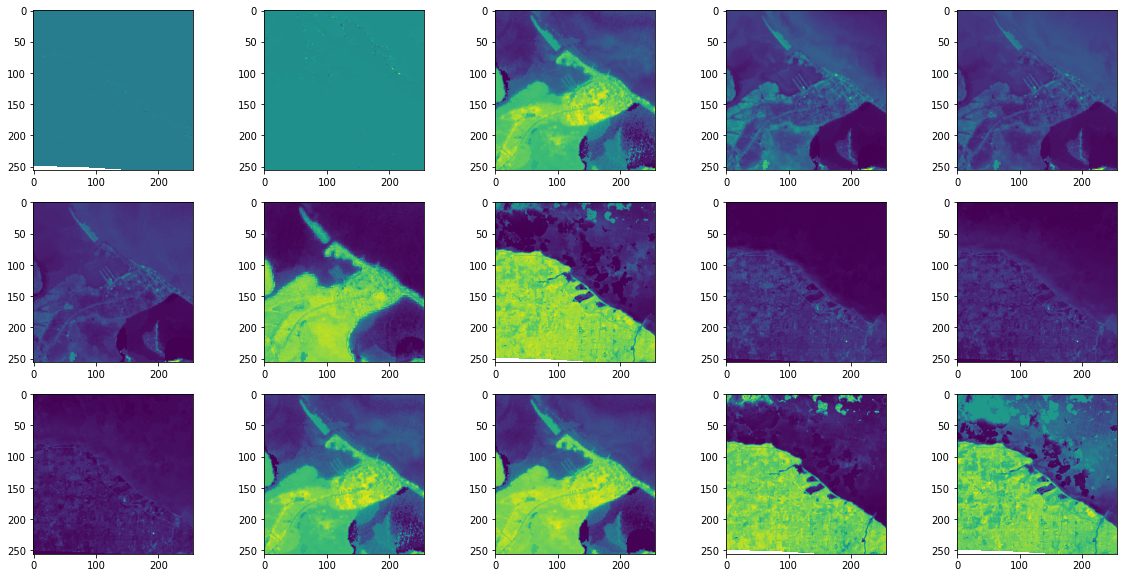

In [39]:
fig, ax = plt.subplots(3,5,figsize=(20,10)) 
i = 0
j = 0
for x in xx:
    ax[i,j].imshow(x)
    j += 1
    if j == 5: 
        j = 0
        i += 1

In [9]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras import regularizers
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

from keras.applications.vgg16 import VGG16

In [29]:
#vgg16 with top
vgg16_model = VGG16(include_top=False, weights='imagenet', input_shape=(256,256,3))
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from collections import deque
from keras.activations import relu, linear
from keras.losses import mean_squared_error
from keras.optimizers import Adam
import tensorflow as tf

In [27]:
def build_model(den,lr):
    model = Sequential()
    #model.add(tf.keras.Input(shape=(6,6,2,)))
    #for layer in den:
    model.add(Conv2D(
                        filters = 12, 
                        kernel_size = (3,3),
                        strides = (1,1),
                        padding = 'valid',
                        activation = relu,
                        input_shape = (256,256,15)))#, data_format = 'channels_last'))
    model.add(Flatten())
    model.add(Dense(64, activation = relu))
    model.add(Dense(32, activation = relu))


    model.add(Dense(1, activation=linear))

    model.compile(loss=mean_squared_error,optimizer=Adam(lr=lr))
    print(model.summary())
    return model

In [28]:
mod1 = build_model(1,.002)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 254, 254, 12)      1632      
_________________________________________________________________
flatten_2 (Flatten)          (None, 774192)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                49548352  
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 49,552,097
Trainable params: 49,552,097
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
xx.dtype
if True in np.isnan(xx): print('true')
np.sum(np.isnan(xx))

true


1816

In [15]:
xx1 = np.nan_to_num(xx)

In [23]:
print(xx1.shape)
xx2 = xx1.reshape(1, 256,256, -1)
print(xx2.shape)

(15, 256, 256)
(1, 256, 256, 15)


In [24]:
mod1.predict(xx2)

array([[-0.65755415]], dtype=float32)

In [ ]:

spli
